In [15]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import LSTM, RepeatVector,TimeDistributed, Dense, Input

            Robberies
Month                
1966-01-01         41
1966-02-01         39
1966-03-01         50
1966-04-01         40
1966-05-01         43


<Axes: xlabel='Month'>

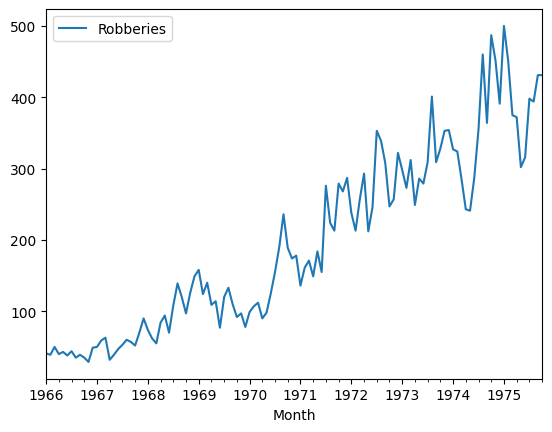

In [16]:

df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-robberies.csv")
df["Month"] = pd.to_datetime(df["Month"])
df = df.set_index("Month")
print(df.head())
df.plot()

In [17]:
max_value = max(df['Robberies'])
min_value = min(df['Robberies'])

def normalize_data(data):
    return (data - min_value) / (max_value - min_value)

def denormalize_data(data):
    return data * (max_value - min_value) + min_value

normalized_df = normalize_data(df['Robberies'])

n_features = 1
n_future = 40
n_past = 40

x = []
for i in range(len(normalized_df) - n_past + 1 - n_future):
    window = normalized_df.iloc[i:i+n_past].to_numpy().reshape(-1, 1)
    x.append(window)
x = np.array(x)

y = []
for i in range(n_future, len(normalized_df) - n_past + 1):
    window = normalized_df.iloc[i:i+n_future].to_numpy().reshape(-1, 1)
    y.append(window)
y = np.array(y)

train_size = 0.8
validation_size = 0.1
test_size = 0.1

indices = np.arange(min(len(x),len(y)))
np.random.shuffle(indices)
train_index = int(train_size * len(indices))
val_index = int((train_size + validation_size) * len(indices))

train_indices = indices[:train_index]
val_indices = indices[train_index:val_index]
test_indices = indices[val_index:]

x_train, y_train = x[train_indices], y[train_indices]
x_val, y_val = x[val_indices], y[val_indices]
x_test, y_test = x[test_indices], y[test_indices]

print("Number of samples in training set:", len(x_train))
print("Number of samples in validation set:", len(x_val))
print("Number of samples in test set:", len(x_test))

print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

Number of samples in training set: 31
Number of samples in validation set: 4
Number of samples in test set: 4
(31, 40, 1)
(4, 40, 1)
(4, 40, 1)


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_47 (LSTM)                  │ (None, 40, 500)        │     1,004,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_48 (LSTM)                  │ (None, 40, 500)        │     2,002,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_49 (LSTM)                  │ (None, 40, 500)        │     2,002,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_50 (LSTM)                  │ (None, 40, 500)        │     2,002,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_51 (LSTM)                  │ (None, 40, 500)        │     2,002,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_52 (LSTM)                  │ (None, 500)            │     2,002,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_7 (RepeatVector)  │ (None, 40, 500)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_53 (LSTM)                  │ (None, 40, 500)        │     2,002,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_54 (LSTM)                  │ (None, 40, 500)        │     2,002,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_55 (LSTM)                  │ (None, 40, 500)        │     2,002,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_56 (LSTM)                  │ (None, 40, 500)        │     2,002,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_57 (LSTM)                  │ (None, 40, 500)        │     2,002,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_6              │ (None, 40, 1)          │           501 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,024,501 (80.20 MB)

 Trainable params: 21,024,501 (80.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - loss: 0.2797 - val_loss: 0.2560
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.2191 - val_loss: 8.7286
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 8.3657 - val_loss: 0.2291
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1942 - val_loss: 0.2779
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.2389 - val_loss: 0.2841
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.2446 - val_loss: 0.2801
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.2409 - val_loss: 0.2709
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.2324 - val_loss: 0.2578
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.2203 - val_loss: 0.2408
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.2047 - val_loss: 0.2191
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1848 - val_loss: 0.1911
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1593 - val_loss: 0.1543
Epoch 13/20

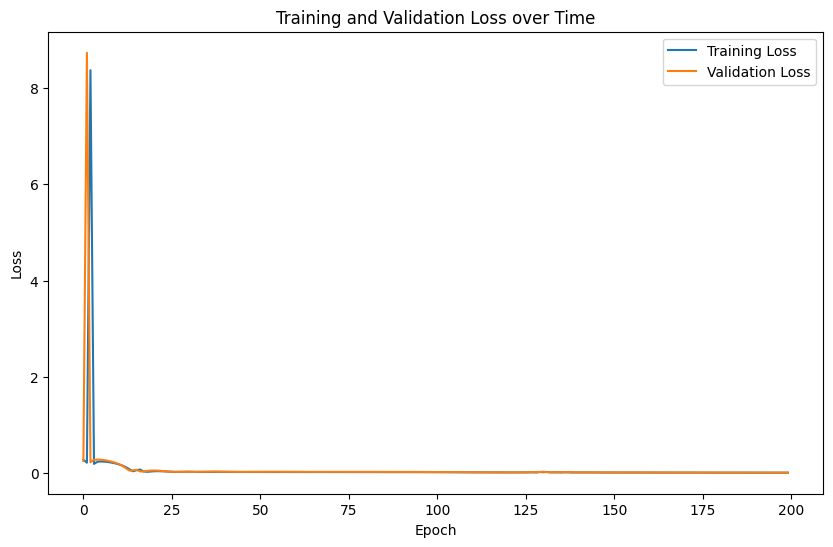

In [18]:
batch_size = 79
epochs = 200
hidden_layer = 500

model = Sequential()
model.add(LSTM(hidden_layer, input_shape=(n_past, n_features), return_sequences=True))
model.add(LSTM(hidden_layer, return_sequences=True))
model.add(LSTM(hidden_layer, return_sequences=True))
model.add(LSTM(hidden_layer, return_sequences=True))
model.add(LSTM(hidden_layer, return_sequences=True))
model.add(LSTM(hidden_layer))
model.add(RepeatVector(n_future))
model.add(LSTM(hidden_layer, return_sequences=True))
model.add(LSTM(hidden_layer, return_sequences=True))
model.add(LSTM(hidden_layer, return_sequences=True))
model.add(LSTM(hidden_layer, return_sequences=True))
model.add(LSTM(hidden_layer, return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')
model.summary()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Time')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


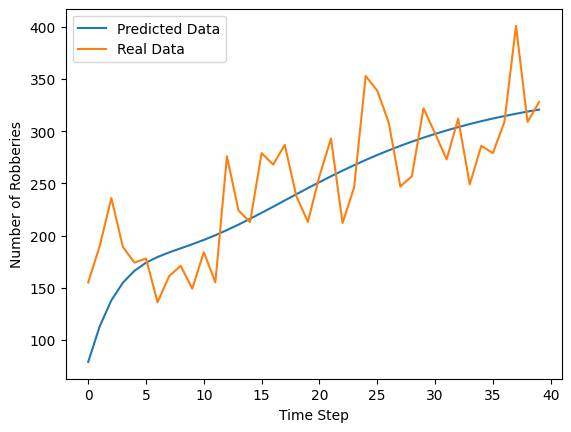

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


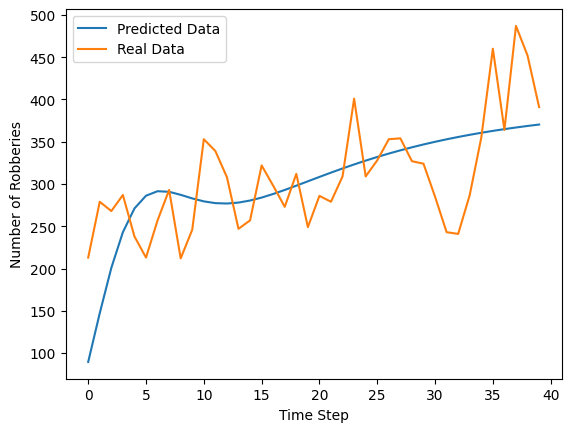

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


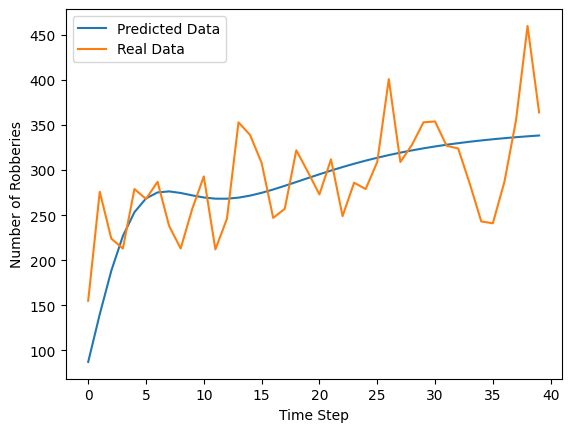

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


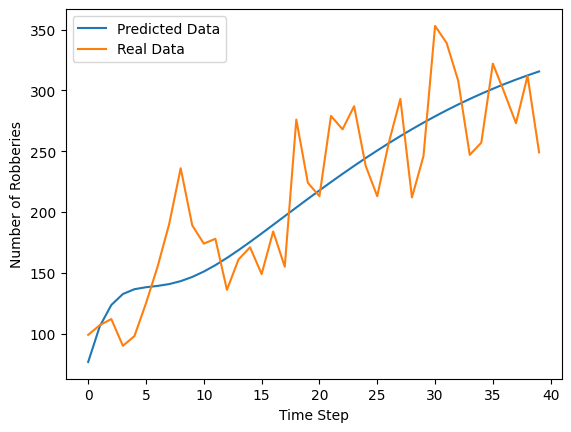

In [20]:
for i, x in enumerate(x_val):
    x = x.reshape(1,n_past,1)
    predicted = denormalize_data(model.predict(x)).flatten()
    real = denormalize_data(y_val[i].flatten())
    plt.plot(predicted, label='Predicted Data')
    plt.plot(real, label='Real Data')
    plt.xlabel('Time Step')
    plt.ylabel('Number of Robberies')
    plt.legend()
    plt.show()